### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
tf.compat.v1.set_random_seed(42)

TensorFlow 2.x selected.


In [3]:
tf.__version__

'2.0.0'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [6]:
print(testY[0:5])

[9 2 1 1 6]


In [7]:
trainX.shape

(60000, 28, 28)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


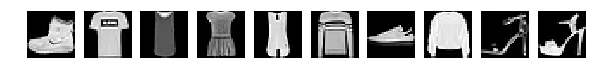

In [10]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(trainY[0:10][i])))
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [12]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 26us/sample - loss: 164.5089 - accuracy: 0.1696 - val_loss: 6984.9458 - val_accuracy: 0.1975
Epoch 2/50
60000/60000 [==============================] - 0s 6us/sample - loss: 6954.1875 - accuracy: 0.1982 - val_loss: 11586.7793 - val_accuracy: 0.3287
Epoch 3/50
60000/60000 [==============================] - 0s 8us/sample - loss: 11622.5713 - accuracy: 0.3359 - val_loss: 13518.5713 - val_accuracy: 0.2733
Epoch 4/50
60000/60000 [==============================] - 0s 6us/sample - loss: 13541.5186 - accuracy: 0.2722 - val_loss: 14069.8174 - val_accuracy: 0.2747
Epoch 5/50
60000/60000 [==============================] - 0s 6us/sample - loss: 14032.1729 - accuracy: 0.2766 - val_loss: 16005.6943 - val_accuracy: 0.1651
Epoch 6/50
60000/60000 [==============================] - 0s 6us/sample - loss: 15936.8936 - accuracy: 0.1653 - val_loss: 10311.0654 - val_accuracy: 0.3000
Epoch 7/50
60000/

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [14]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 24us/sample - loss: 2.7075 - accuracy: 0.1307 - val_loss: 29.4049 - val_accuracy: 0.1855
Epoch 2/50
60000/60000 [==============================] - 1s 13us/sample - loss: 2.4365 - accuracy: 0.1928 - val_loss: 18.1263 - val_accuracy: 0.2078
Epoch 3/50
60000/60000 [==============================] - 1s 13us/sample - loss: 2.2217 - accuracy: 0.2528 - val_loss: 13.0290 - val_accuracy: 0.2278
Epoch 4/50
60000/60000 [==============================] - 1s 13us/sample - loss: 2.0491 - accuracy: 0.3039 - val_loss: 10.0210 - val_accuracy: 0.2511
Epoch 5/50
60000/60000 [==============================] - 1s 13us/sample - loss: 1.9084 - accuracy: 0.3467 - val_loss: 8.0158 - val_accuracy: 0.2682
Epoch 6/50
60000/60000 [==============================] - 1s 13us/sample - loss: 1.7924 - accuracy: 0.3822 - val_loss: 6.5887 - val_accuracy: 0.2849
Epoch 7/50
60000/60000 [============================

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
from keras import optimizers
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
print(model)

In [17]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 23us/sample - loss: 3.1170 - accuracy: 0.0684 - val_loss: 27.8096 - val_accuracy: 0.0895
Epoch 2/50
60000/60000 [==============================] - 1s 13us/sample - loss: 3.0763 - accuracy: 0.0718 - val_loss: 19.2267 - val_accuracy: 0.0930
Epoch 3/50
60000/60000 [==============================] - 1s 13us/sample - loss: 3.0365 - accuracy: 0.0754 - val_loss: 15.3003 - val_accuracy: 0.0956
Epoch 4/50
60000/60000 [==============================] - 1s 13us/sample - loss: 2.9975 - accuracy: 0.0789 - val_loss: 12.9077 - val_accuracy: 0.0986
Epoch 5/50
60000/60000 [==============================] - 1s 13us/sample - loss: 2.9593 - accuracy: 0.0825 - val_loss: 11.2480 - val_accuracy: 0.1013
Epoch 6/50
60000/60000 [==============================] - 1s 13us/sample - loss: 2.9219 - accuracy: 0.0868 - val_loss: 10.0080 - val_accuracy: 0.1055
Epoch 7/50
60000/60000 [==========================

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 30us/sample - loss: 2.3480 - accuracy: 0.1000 - val_loss: 2.3477 - val_accuracy: 0.1000
Epoch 2/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3465 - accuracy: 0.1000 - val_loss: 2.3463 - val_accuracy: 0.1000
Epoch 3/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3450 - accuracy: 0.1000 - val_loss: 2.3450 - val_accuracy: 0.1000
Epoch 4/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3436 - accuracy: 0.1000 - val_loss: 2.3437 - val_accuracy: 0.1000
Epoch 5/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3423 - accuracy: 0.1000 - val_loss: 2.3424 - val_accuracy: 0.1000
Epoch 6/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3410 - accuracy: 0.1000 - val_loss: 2.3412 - val_accuracy: 0.1000
Epoch 7/50
60000/60000 [==============================] 

## Review model

In [20]:
model.evaluate(testX, testY)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.3081594650268555, 0.1]

- There is no effect of batch normalization as accuracy in first two model is nearly same
- After changing learning rate to 0.001 in the 3 model, accuracy has dropped significantly for same no if iteration due to lower learning rate.
- Addition of hidden 3 layer with large no neurons has dropped accuracy even further even though learning rate was higher than model 3.

### Run the model